In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

medv_df = pd.read_csv('housing.csv')

In [2]:
medv_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
medv_df.MEDV.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [4]:
medv_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [5]:
medv_df.drop('MEDV', axis=1).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
medv_df['MEDV']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(medv_df.drop('MEDV', axis=1), medv_df['MEDV'], test_size=0.25, random_state=25)

In [8]:
reg = LinearRegression().fit(X_train, y_train)
pred = reg.predict(X_test)
print(mean_squared_error(y_test, pred, squared=True))

22.01822411111621


In [9]:
y_test.describe()

count    127.000000
mean      22.318898
std        8.486439
min        5.000000
25%       16.950000
50%       21.400000
75%       24.650000
max       50.000000
Name: MEDV, dtype: float64

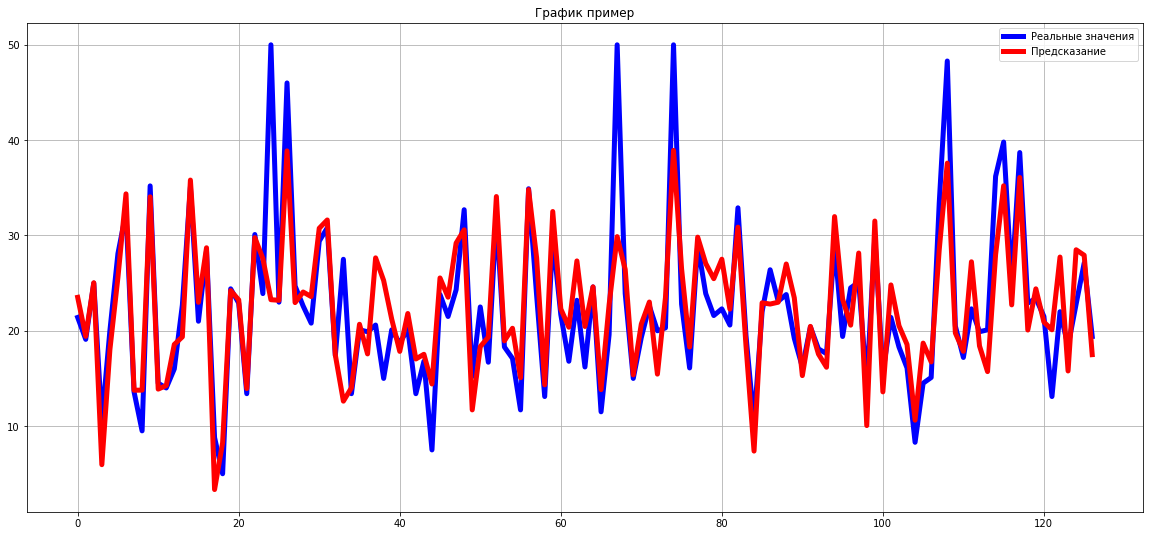

In [10]:
plt.figure(figsize=(20,9))
plt.plot(y_test.values, "blue",linewidth=5, label='Реальные значения')
plt.plot(pred, "red",linewidth=5, label='Предсказание')
plt.legend(loc='best')
plt.title("График пример")
plt.grid(True)
plt.show()

### Построим модель с помощью деревьев

In [11]:
from sklearn import tree
import graphviz 
clf = tree.DecisionTreeRegressor()

In [12]:
clf = clf.fit(X_train, y_train)

In [13]:
pred_clf = clf.predict(X_test)

In [16]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("smpl")

'smpl.pdf'

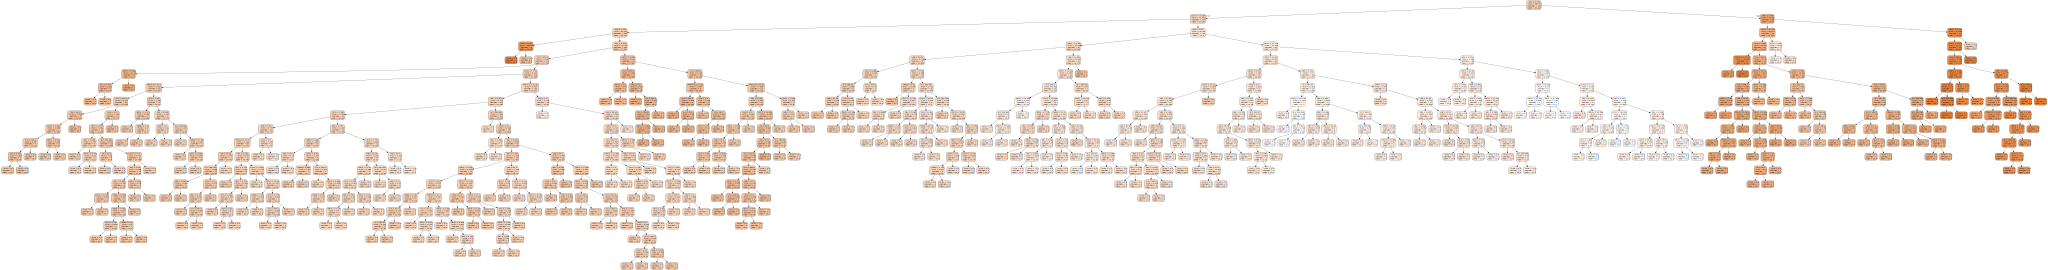

In [17]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=medv_df.drop('MEDV',axis=1).columns,  
                      class_names=medv_df.MEDV,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [18]:
frame = { 'FeatureImportance': clf.feature_importances_, 'Feature': X_train.columns }
result = pd.DataFrame(frame)
result.sort_values(by='FeatureImportance', ascending=False).head(10)

,FeatureImportance,Feature
5,0.612121,RM
12,0.203223,LSTAT
7,0.051291,DIS
0,0.043291,CRIM
4,0.042620,NOX
9,0.019912,TAX
11,0.007218,B
10,0.006704,PTRATIO
6,0.004951,AGE
2,0.003033,INDUS
